In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Configuração visual para relatórios profissionais
sns.set_theme(style="whitegrid")
%matplotlib inline

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


In [3]:
# Carregar o dataset
# Certifique-se de que o nome do arquivo está correto no seu ambiente
df = pd.read_csv('credito_banco_vida_imaginaria.csv')

# Criar coluna numérica para cálculos (Sim = 1, Não = 0)
df['Inadimplente_Num'] = df['Inadimplente'].map({'Sim': 1, 'Não': 0})

print(f"Dataset carregado: {df.shape[0]} registros.")
df.head()

Dataset carregado: 2000 registros.


,ClienteID,Idade,Genero,EstadoCivil,Dependentes,Escolaridade,RendaMensal,TipoEmprego,TempoEmprego,TipoCredito,ValorCredito,Prazo,HistoricoCredito,Inadimplente,Score,Inadimplente_Num
0,CLI000001,22,Masculino,Solteiro,0,Médio,3131,Servidor Público,1,Veículo,65086,43,Regular,Sim,596,1
1,CLI000002,75,Feminino,Divorciado,3,Médio,1958,Aposentado,0,Veículo,66365,33,Ruim,Sim,300,1
2,CLI000003,40,Masculino,Solteiro,0,Pós-graduação,6651,Servidor Público,16,Veículo,42136,28,Ruim,Sim,451,1
3,CLI000004,20,Masculino,Solteiro,2,Médio,3404,Autônomo,1,Consignado,6567,21,Regular,Não,653,0
4,CLI000005,30,Masculino,Solteiro,2,Pós-graduação,7964,Servidor Público,10,Veículo,29831,47,Bom,Não,850,0


Taxa de Inadimplência Geral: 26.15%


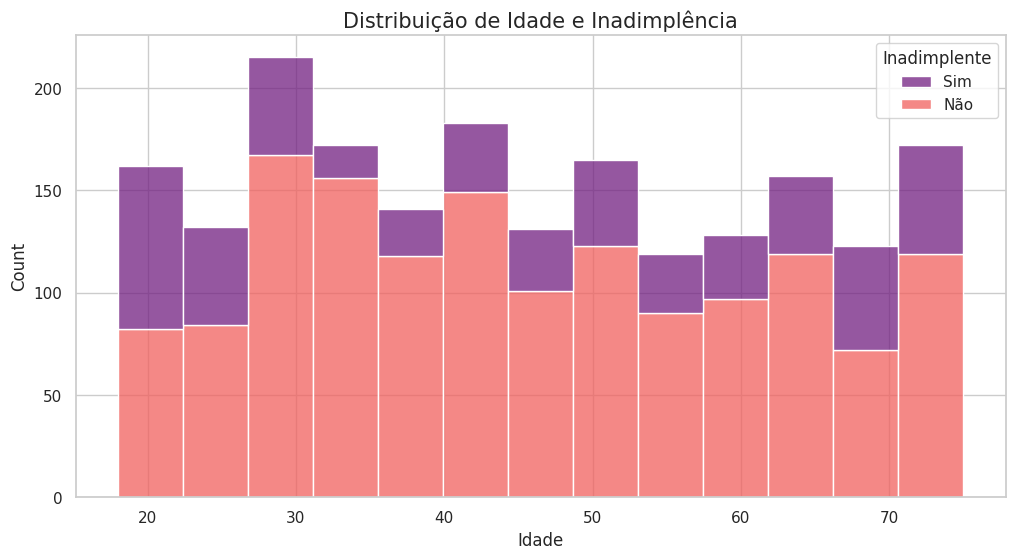

/tmp/ipython-input-499946484.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TipoCredito', y='Inadimplente_Num', palette='viridis', ci=None)
/tmp/ipython-input-499946484.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TipoCredito', y='Inadimplente_Num', palette='viridis', ci=None)


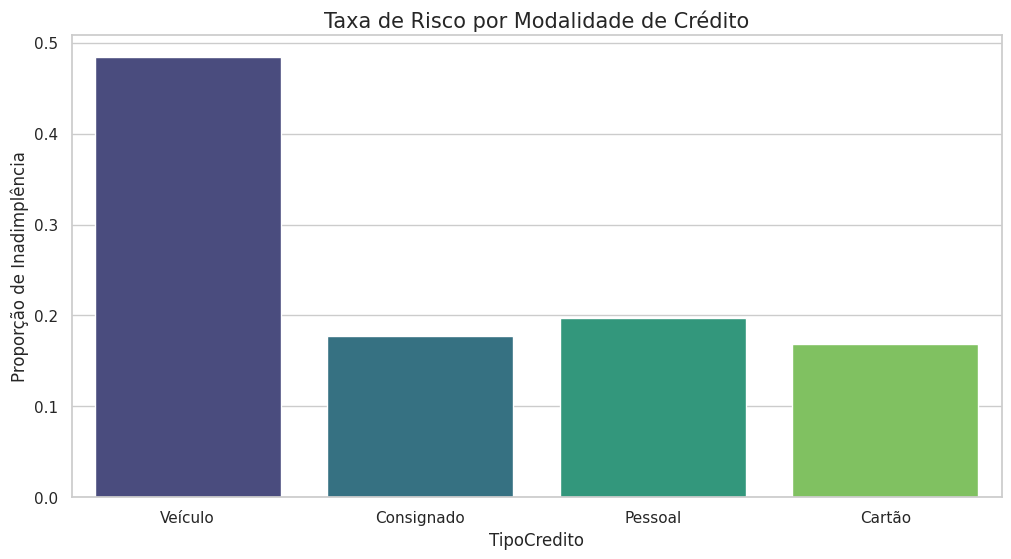

In [4]:
# 1. Taxa de Inadimplência Geral
taxa_geral = df['Inadimplente_Num'].mean() * 100
print(f"Taxa de Inadimplência Geral: {taxa_geral:.2f}%")

# 2. Risco por Faixa Etária
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Idade', hue='Inadimplente', multiple='stack', palette='magma')
plt.title('Distribuição de Idade e Inadimplência', fontsize=15)
plt.show()

# 3. Risco por Tipo de Crédito
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='TipoCredito', y='Inadimplente_Num', palette='viridis', ci=None)
plt.title('Taxa de Risco por Modalidade de Crédito', fontsize=15)
plt.ylabel('Proporção de Inadimplência')
plt.show()

In [5]:
# Preparação dos dados (Transformar texto em números)
df_ml = df.drop(['ClienteID', 'Inadimplente_Num'], axis=1)
le = LabelEncoder()

for col in df_ml.select_dtypes(include=['object']).columns:
    df_ml[col] = le.fit_transform(df_ml[col])

# Divisão Treino/Teste
X = df_ml.drop('Inadimplente', axis=1)
y = df_ml['Inadimplente']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar Modelo (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
print(f"Acurácia do Modelo: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nRelatório Técnico:")
print(classification_report(y_test, y_pred))

Acurácia do Modelo: 96.67%

Relatório Técnico:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       440
           1       0.93      0.94      0.94       160

    accuracy                           0.97       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600



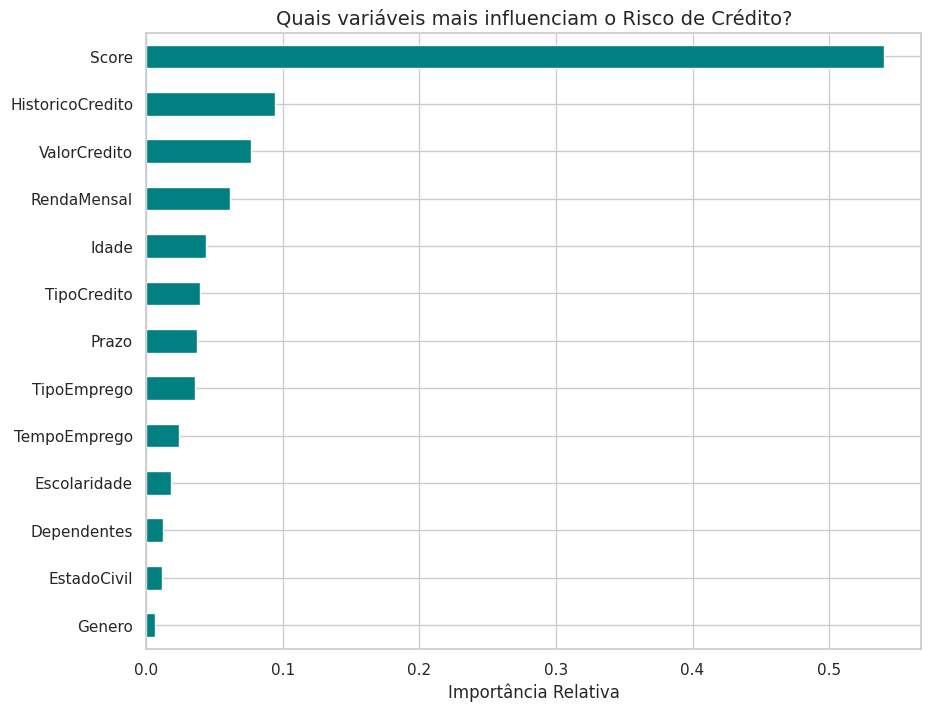

In [6]:
importances = pd.Series(modelo.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='teal')
plt.title('Quais variáveis mais influenciam o Risco de Crédito?', fontsize=14)
plt.xlabel('Importância Relativa')
plt.show()